In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#1

ratings = pd.read_csv("/Users/kennyhuynh/Desktop/ml-latest-small/ratings.csv")

user_id = ratings['userId'].values
movie_id = ratings['movieId'].values
rating = ratings['rating'].values

sparsity = len(ratings)/float(len(set(movie_id))*len(set(user_id)))
print("Sparsity: ", sparsity)

Sparsity:  0.016999683055613623


Text(0.5, 1.0, 'Frequency of rating values')

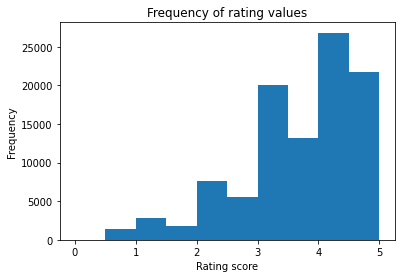

In [4]:
#2

bins = np.linspace(0,5,num=11)
plt.hist(rating,bins=bins)
plt.xlabel("Rating score"); plt.ylabel("Frequency"); plt.title("Frequency of rating values")

Text(0.5, 1.0, 'Number of ratings for each movie index')

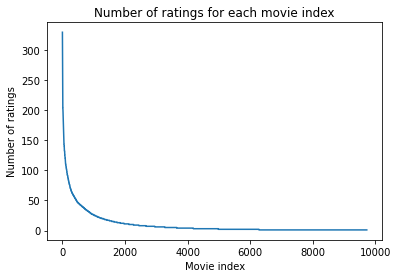

In [5]:
#3

from collections import Counter

counter = Counter(movie_id)
num_ratings = sorted(list(counter.values()),reverse=True)
plt.plot(num_ratings)
plt.xlabel("Movie index"); plt.ylabel("Number of ratings"); plt.title("Number of ratings for each movie index")

Text(0.5, 1.0, 'Number of ratings for each user index')

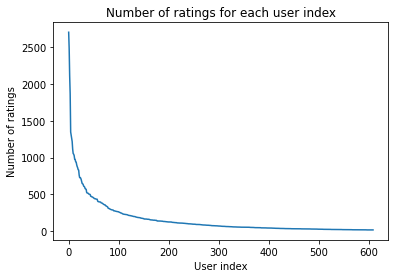

In [6]:
#4

counter = Counter(user_id)
num_users = sorted(list(counter.values()),reverse=True)
plt.plot(num_users)
plt.xlabel("User index"); plt.ylabel("Number of ratings"); plt.title("Number of ratings for each user index")

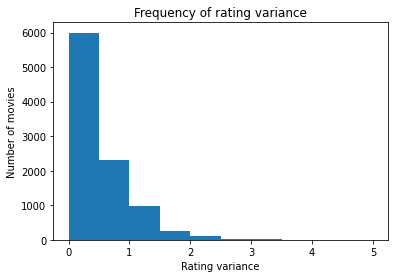

In [8]:
#6

from surprise import Dataset, Reader

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1, rating_scale=(0.5, 5))
file_path = "/Users/kennyhuynh/Desktop/ml-latest-small/ratings.csv"
data = Dataset.load_from_file(file_path, reader=reader)

ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

var = {}
for i in ref.keys():
    var[i] = np.var(ref[i])

var_val = list(var.values())
bins = np.linspace(0,5,num=11)
plt.figure()
plt.hist(var_val,bins=bins)
plt.xlabel("Rating variance"); plt.ylabel("Number of movies"); plt.title("Frequency of rating variance")
plt.show()


2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity mat

Text(0.5, 1.0, 'k-NN collaborative filter (KNNWithMeans) with 10-fold CV')

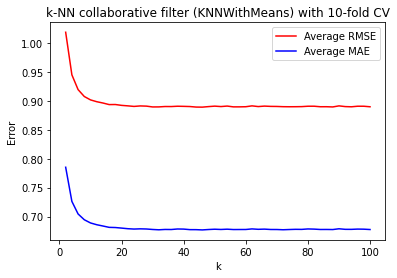

In [10]:
#10

from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1, rating_scale=(0.5, 5))
file_path = "/Users/kennyhuynh/Desktop/ml-latest-small/ratings.csv"
data = Dataset.load_from_file(file_path, reader=reader)

avg_rmse = []
avg_mae = []
k = np.linspace(2,100,dtype=int)
for i in k:
    print(i)
    perf = cross_validate(KNNWithMeans(k=i,sim_options={'name':'pearson'}),data,cv=10)
    avg_rmse.append(np.mean(perf['test_rmse']))
    avg_mae.append(np.mean(perf['test_mae']))

fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.plot(k, avg_mae, 'b', label='Average MAE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV")

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
Minimum average RMSE for Popular Movie Trimming:  0.8724061423090701


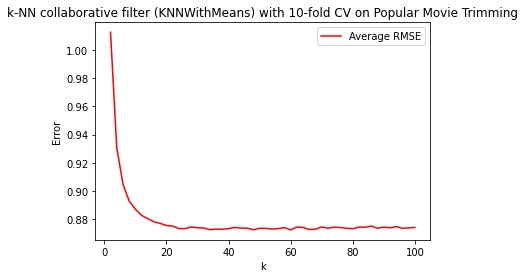

In [11]:
#12

from surprise.model_selection import KFold
from surprise import accuracy

kf = KFold(n_splits=10)
k = np.linspace(2,100,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):
        pop_trim = [j for j in testset if len(ref[j[1]]) > 2]
        pred = KNNWithMeans(k=i,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(pop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse.append(rmse/10.0)

print("Minimum average RMSE for Popular Movie Trimming: ", min(avg_rmse))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV on Popular Movie Trimming")
plt.show()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
Minimum average RMSE for Unpopular Movie Trimming:  1.110994777230324


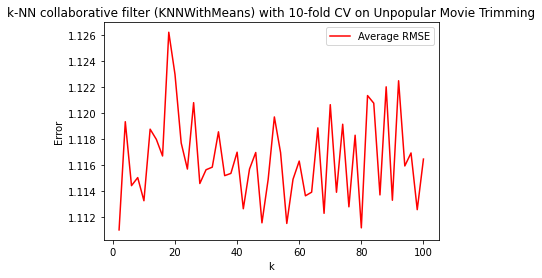

In [12]:
#13

kf = KFold(n_splits=10)
k = np.linspace(2,100,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):
        unpop_trim = [j for j in testset if len(ref[j[1]]) <= 2]
        pred = KNNWithMeans(k=i,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(unpop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse.append(rmse/10.0)

print("Minimum average RMSE for Unpopular Movie Trimming: ", min(avg_rmse))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV on Unpopular Movie Trimming")
plt.show()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
Minimum average RMSE for High variance Movie Trimming:  1.479523531034298


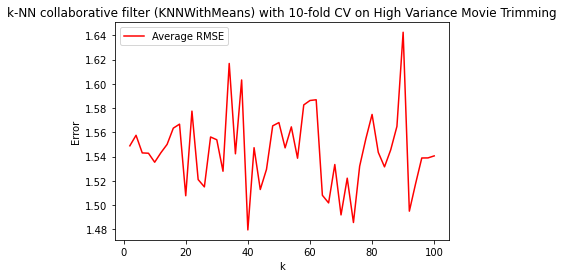

In [13]:
#14

kf = KFold(n_splits=10)
k = np.linspace(2,100,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])
        
for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):        
        highvar_trim = [j for j in testset if (len(ref[j[1]]) >= 5 and np.var(ref[j[1]]) >= 2)]
        pred = KNNWithMeans(k=i,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(highvar_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse.append(rmse/10.0)

print("Minimum average RMSE for High variance Movie Trimming: ", min(avg_rmse))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV on High Variance Movie Trimming")
plt.show()

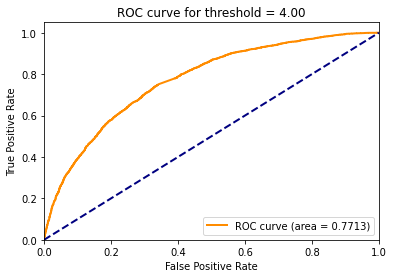

In [14]:
#15

from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

trainset, testset = train_test_split(data, test_size=.1)
pred = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)
y_true = []
thresh = 4
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate');
plt.title('ROC curve for threshold = %0.2f' % thresh);plt.legend(loc="lower right")
plt.show()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE:  0.9119005110809771
Minimum average MAE:  0.6935093802841836


Text(0.5, 1.0, 'NMF collaborative filter with 10-fold CV')

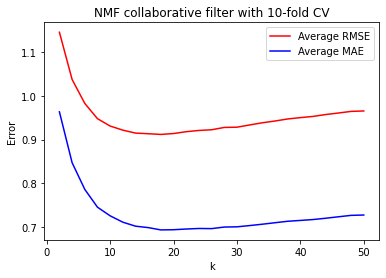

In [15]:
#17

from surprise.prediction_algorithms.matrix_factorization import NMF

avg_rmse = []
avg_mae = []
k = np.linspace(2,50,num=25,dtype=int)
for i in k:
    print(i)
    perf = cross_validate(NMF(n_factors=i,verbose=False),data,cv=10)
    avg_rmse.append(np.mean(perf['test_rmse']))
    avg_mae.append(np.mean(perf['test_mae']))

print("Minimum average RMSE: ", min(avg_rmse))
print("Minimum average MAE: ", min(avg_mae))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.plot(k, avg_mae, 'b', label='Average MAE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("NMF collaborative filter with 10-fold CV")

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE for Popular Movie Trimming:  0.8914110177913962


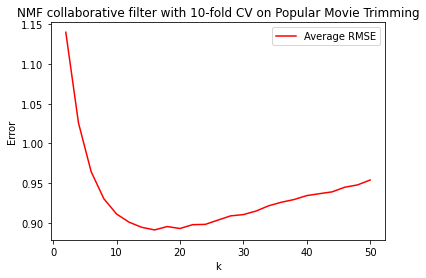

In [16]:
#19

kf = KFold(n_splits=10)
k = np.linspace(2,50,num=25,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):
        pop_trim = [j for j in testset if len(ref[j[1]]) > 2]
        pred = NMF(n_factors=i,verbose=False).fit(trainset).test(pop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse.append(rmse/10.0)

print("Minimum average RMSE for Popular Movie Trimming: ", min(avg_rmse))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("NMF collaborative filter with 10-fold CV on Popular Movie Trimming")
plt.show()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE for Unpopular Movie Trimming:  1.1718723420005657


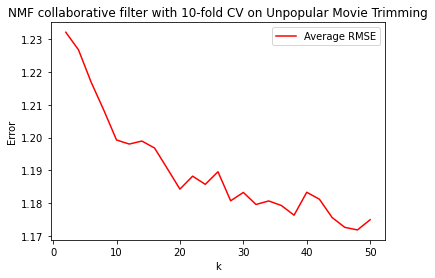

In [17]:
#20

kf = KFold(n_splits=10)
k = np.linspace(2,50,num=25,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):
        unpop_trim = [j for j in testset if len(ref[j[1]]) <= 2]
        pred = NMF(n_factors = i,verbose=False).fit(trainset).test(unpop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse.append(rmse/10.0)

print("Minimum average RMSE for Unpopular Movie Trimming: ", min(avg_rmse))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("NMF collaborative filter with 10-fold CV on Unpopular Movie Trimming")
plt.show()


2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE for High variance Movie Trimming:  1.6334791761380596


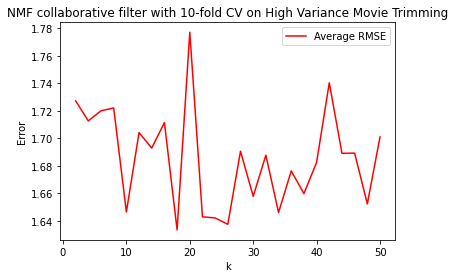

In [18]:
#21

kf = KFold(n_splits=10)
k = np.linspace(2,50,num=25,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])
        
for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):        
        highvar_trim = [j for j in testset if (len(ref[j[1]]) >= 5 and np.var(ref[j[1]]) >= 2)]
        pred = NMF(n_factors=i,verbose=False).fit(trainset).test(highvar_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse.append(rmse/10.0)

print("Minimum average RMSE for High variance Movie Trimming: ", min(avg_rmse))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("NMF collaborative filter with 10-fold CV on High Variance Movie Trimming")
plt.show()

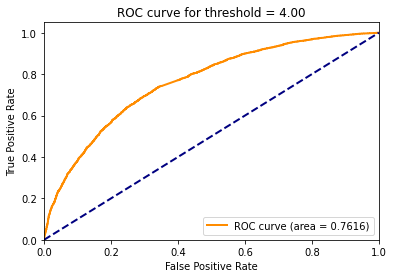

In [19]:
#22

trainset, testset = train_test_split(data, test_size=.1)
pred = NMF(n_factors=18,verbose=False).fit(trainset).test(testset)
y_true = []
thresh = 4
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate');
plt.title('ROC curve for threshold = %0.2f' % thresh);plt.legend(loc="lower right")
plt.show()

In [21]:
#23

trainset, testset = train_test_split(data, test_size=.1)
nmf = NMF(n_factors=20,verbose=False)
nmf.fit(trainset).test(testset)
V = nmf.qi
k = [0,5,10,15,16,17,18,19]
df = pd.read_csv("/Users/kennyhuynh/Desktop/ml-latest-small/movies.csv",names=['movieid','title','genres'],header=0)
for i in k:
    print(i)
    mov = V[:,i]
    mov1 = [(n,j) for n,j in enumerate(mov)]
    mov1.sort(key = lambda x:x[1], reverse=True)
    for a in mov1[:10]:
        print(df['genres'][a[0]])

0
Comedy|Romance
Comedy|Drama|Horror
Drama|Thriller
Action|Adventure|Animation|Fantasy
Drama
Drama
Drama
Comedy
Action|Crime|Drama|Thriller
Drama
5
Comedy
Comedy
Comedy|Romance
Action|Crime|Drama
Drama
Comedy
Comedy|Horror
Action|Drama|War
Action|Sci-Fi
Action|Comedy|Crime
10
Drama
Drama
Comedy
Musical
Comedy|Drama
Animation|Children|Drama|Fantasy|IMAX
Crime|Drama|Thriller
Drama
Drama|Fantasy
Crime|Drama|Mystery
15
Documentary
Comedy|Romance
Drama|Mystery|Thriller
Drama
Romance
Drama|Mystery|Romance
Action|Adventure|Comedy|Drama|Romance
Crime|Mystery|Thriller
Sci-Fi
Comedy|Drama|Romance
16
Drama|Romance
Drama|Romance
Drama
Drama|Romance|Sci-Fi
Comedy|Horror
Action|Comedy|Romance
Drama|Romance
Drama
Comedy|Thriller
Drama|Fantasy|Horror
17
Animation|Fantasy|Mystery
Comedy|Crime|Drama|Thriller
Comedy|Fantasy|Romance
Drama|Sci-Fi
Comedy|Drama|Romance
Drama|Romance|War
Action|War
Comedy|Horror|Thriller
Documentary
Crime|Drama|Horror
18
Drama|Mystery|Thriller
Action|Drama
Action|Adventure|Fa

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE:  0.8652083390716919
Minimum average MAE:  0.6642001956535919


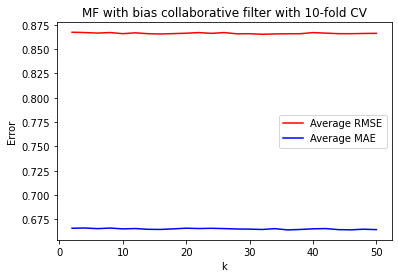

In [22]:
#24

from surprise.prediction_algorithms.matrix_factorization import SVD

avg_rmse = []
avg_mae = []
k = np.linspace(2,50,num=25,dtype=int)
for i in k:
    print(i)
    perf = cross_validate(SVD(n_factors=i,verbose=False),data,cv=10)
    avg_rmse.append(np.mean(perf['test_rmse']))
    avg_mae.append(np.mean(perf['test_mae']))

print("Minimum average RMSE: ", min(avg_rmse))
print("Minimum average MAE: ", min(avg_mae))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.plot(k, avg_mae, 'b', label='Average MAE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("MF with bias collaborative filter with 10-fold CV")
plt.show()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE for Popular Movie Trimming:  0.8574484812310328


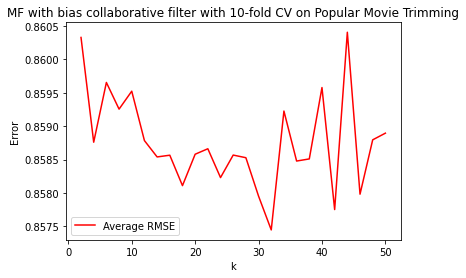

In [23]:
#26

kf = KFold(n_splits=10)
k = np.linspace(2,50,num=25,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])
        
for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):
        pop_trim = [j for j in testset if len(ref[j[1]]) > 2]
        pred = SVD(n_factors=i,verbose=False).fit(trainset).test(pop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse.append(rmse/10.0)

print("Minimum average RMSE for Popular Movie Trimming: ", min(avg_rmse))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("MF with bias collaborative filter with 10-fold CV on Popular Movie Trimming")
plt.show()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE for Unpopular Movie Trimming:  0.9706730162042637


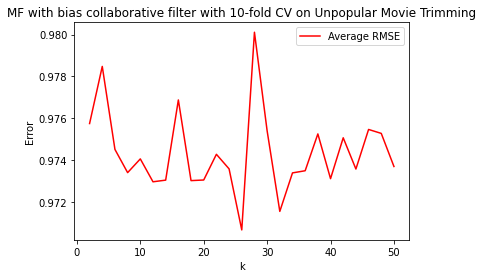

In [24]:
#27

kf = KFold(n_splits=10)
k = np.linspace(2,50,num=25,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):
        unpop_trim = [j for j in testset if len(ref[j[1]]) <= 2]
        pred = SVD(n_factors = i,verbose=False).fit(trainset).test(unpop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse.append(rmse/10.0)

print("Minimum average RMSE for Unpopular Movie Trimming: ", min(avg_rmse))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("MF with bias collaborative filter with 10-fold CV on Unpopular Movie Trimming")
plt.show()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE for High variance Movie Trimming:  1.4292730381587788


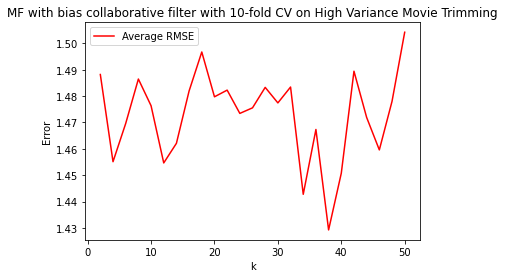

In [25]:
#28

kf = KFold(n_splits=10)
k = np.linspace(2,50,num=25,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])
        
for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):        
        highvar_trim = [j for j in testset if (len(ref[j[1]]) >= 5 and np.var(ref[j[1]]) >= 2)]
        pred = SVD(n_factors=i,verbose=False).fit(trainset).test(highvar_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse.append(rmse/10.0)

print("Minimum average RMSE for High variance Movie Trimming: ", min(avg_rmse))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("MF with bias collaborative filter with 10-fold CV on High Variance Movie Trimming")
plt.show()

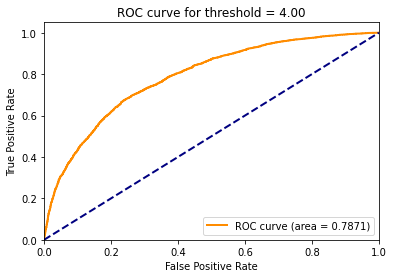

In [26]:
#29

trainset, testset = train_test_split(data, test_size=.1)
pred = SVD(n_factors=18,verbose=False).fit(trainset).test(testset)
y_true = []
thresh = 4
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate');
plt.title('ROC curve for threshold = %0.2f' % thresh);plt.legend(loc="lower right")
plt.show()

In [27]:
#30

from sklearn.metrics import mean_squared_error

ref = {}
for j in data.raw_ratings:
    if j[0] in ref.keys():
        ref[j[0]].append(j[2])
    else:
        ref[j[0]] = []
        ref[j[0]].append(j[2])

user = {}
for j in ref.keys():
    user[j] = np.mean(ref[j])

rmse = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(data):
    pred = [user[i[0]] for i in testset]
    true = [i[2] for i in testset]
    rmse += np.sqrt(mean_squared_error(true,pred))
avg_rmse = rmse/10.0

print("Average RMSE for naive collaborative filter: ", avg_rmse)

Average RMSE for naive collaborative filter:  0.9347033620738958


In [28]:
#31

ref = {}
for j in data.raw_ratings:
    if j[0] in ref.keys():
        ref[j[0]].append(j[2])
    else:
        ref[j[0]] = []
        ref[j[0]].append(j[2])

user = {}
for j in ref.keys():
    user[j] = np.mean(ref[j])

ref1 = {}
for j in data.raw_ratings:
    if j[1] in ref1.keys():
        ref1[j[1]].append(j[2])
    else:
        ref1[j[1]] = []
        ref1[j[1]].append(j[2])

rmse = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(data):
    pop_trim = [j for j in testset if len(ref1[j[1]]) > 2]
    pred = [user[i[0]] for i in pop_trim]
    true = [i[2] for i in pop_trim]
    rmse += np.sqrt(mean_squared_error(true,pred))
avg_rmse = rmse/10.0

print("Average RMSE for naive collaborative filter with Popular Movie Trimming: ", avg_rmse)

Average RMSE for naive collaborative filter with Popular Movie Trimming:  0.9323124182963666


In [29]:
#32

ref = {}
for j in data.raw_ratings:
    if j[0] in ref.keys():
        ref[j[0]].append(j[2])
    else:
        ref[j[0]] = []
        ref[j[0]].append(j[2])

user = {}
for j in ref.keys():
    user[j] = np.mean(ref[j])

ref1 = {}
for j in data.raw_ratings:
    if j[1] in ref1.keys():
        ref1[j[1]].append(j[2])
    else:
        ref1[j[1]] = []
        ref1[j[1]].append(j[2])

rmse = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(data):
    unpop_trim = [j for j in testset if len(ref1[j[1]]) <= 2]
    pred = [user[i[0]] for i in unpop_trim]
    true = [i[2] for i in unpop_trim]
    rmse += np.sqrt(mean_squared_error(true,pred))
avg_rmse = rmse/10.0

print("Average RMSE for naive collaborative filter with Unpopular Movie Trimming: ", avg_rmse)

Average RMSE for naive collaborative filter with Unpopular Movie Trimming:  0.9714753648149612


In [30]:
#33

ref = {}
for j in data.raw_ratings:
    if j[0] in ref.keys():
        ref[j[0]].append(j[2])
    else:
        ref[j[0]] = []
        ref[j[0]].append(j[2])

user = {}
for j in ref.keys():
    user[j] = np.mean(ref[j])

ref1 = {}
for j in data.raw_ratings:
    if j[1] in ref1.keys():
        ref1[j[1]].append(j[2])
    else:
        ref1[j[1]] = []
        ref1[j[1]].append(j[2])

rmse = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(data):
    highvar_trim = [j for j in testset if (len(ref1[j[1]]) >= 5 and np.var(ref1[j[1]]) >= 2)]
    pred = [user[i[0]] for i in highvar_trim]
    true = [i[2] for i in highvar_trim]
    rmse += np.sqrt(mean_squared_error(true,pred))
avg_rmse = rmse/10.0

print("Average RMSE for naive collaborative filter with High Variance Movie Trimming: ", avg_rmse)

Average RMSE for naive collaborative filter with High Variance Movie Trimming:  1.4807566584608713


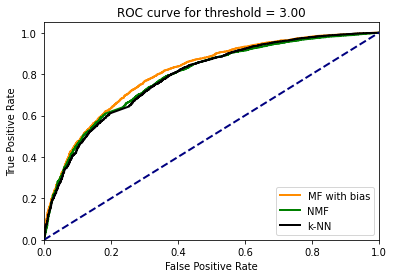

In [31]:
#34

trainset, testset = train_test_split(data, test_size=.1)

pred = SVD(n_factors=18,verbose=False).fit(trainset).test(testset)
y_true = []
thresh = 3
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
lw = 2; plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='MF with bias')

pred = NMF(n_factors=18,verbose=False).fit(trainset).test(testset)
y_true = []
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
lw = 2
plt.plot(fpr, tpr, color='green',lw=lw, label='NMF')

pred = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)
y_true = []
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
lw = 2
plt.plot(fpr, tpr, color='black',lw=lw, label='k-NN')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate');
plt.title('ROC curve for threshold = %0.2f' % thresh);plt.legend(loc="lower right")
plt.show()

1
[0.9292464185554685]
[0.21967395208091597]
2
[0.9292464185554685, 0.9149665567799424]
[0.21967395208091597, 0.3516961925056588]
3
[0.9292464185554685, 0.9149665567799424, 0.914627279408364]
[0.21967395208091597, 0.3516961925056588, 0.41991376891466603]
4
[0.9292464185554685, 0.9149665567799424, 0.914627279408364, 0.9120371776974581]
[0.21967395208091597, 0.3516961925056588, 0.41991376891466603, 0.449043154804596]
5
[0.9292464185554685, 0.9149665567799424, 0.914627279408364, 0.9120371776974581, 0.9104033791167694]
[0.21967395208091597, 0.3516961925056588, 0.41991376891466603, 0.449043154804596, 0.47137370083176194]
6
[0.9292464185554685, 0.9149665567799424, 0.914627279408364, 0.9120371776974581, 0.9104033791167694, 0.9072717798291995]
[0.21967395208091597, 0.3516961925056588, 0.41991376891466603, 0.449043154804596, 0.47137370083176194, 0.48316484056818415]
7
[0.9292464185554685, 0.9149665567799424, 0.914627279408364, 0.9120371776974581, 0.9104033791167694, 0.9072717798291995, 0.908130

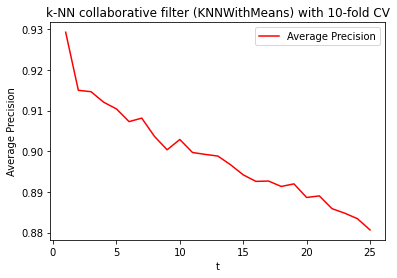

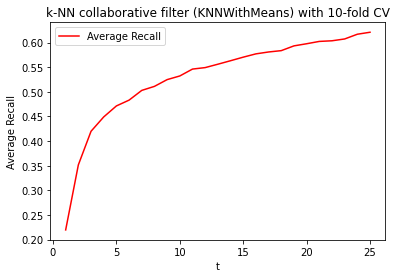

No handles with labels found to put in legend.


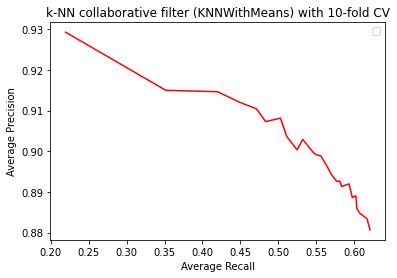

In [32]:
#36

t = np.linspace(1,25,num=25,dtype=int)
avg_precision_knn = []
avg_recall_knn = []
kf = KFold(n_splits=10)
for i in t:
    print(i)
    precision_fold = []
    recall_fold = []
    for trainset, testset in kf.split(data):
        G = {}
        for j in testset:
            if j[0] in G.keys():
                if j[2] >= 3.0:
                    G[j[0]].add(j[1])
            else:
                G[j[0]] = set()
                if j[2] >= 3.0:
                    G[j[0]].add(j[1])
        G_items = {}
        for j in testset:
            if j[0] in G_items.keys():
                G_items[j[0]].append(j[1])
            else:
                G_items[j[0]] = []
                G_items[j[0]].append(j[1])
        G_test = [j for j in testset if (len(G[j[0]]) > 0 and len(G_items[j[0]]) >= i)]
        pred = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(G_test)
        user = {}
        for u in pred:
            if u[0] in user.keys():
                item = (u[1],u[3])
                user[u[0]].append(item)
            else:
                user[u[0]] = []
                item = (u[1],u[3])
                user[u[0]].append(item)
        precision_user = []
        recall_user = []
        for u in user.keys():
            S = user[u]
            S = sorted(S,key=lambda x:x[1],reverse=True)
            S = S[:i]
            S_t = set([j[0] for j in S])
            G_truth = G[u]
            precision = len(S_t.intersection(G_truth))/float(len(S_t))
            recall = len(S_t.intersection(G_truth))/float(len(G_truth))
            precision_user.append(precision)
            recall_user.append(recall)
        precision_fold.append(np.mean(precision_user))
        recall_fold.append(np.mean(recall_user))
    avg_precision_knn.append(np.mean(precision_fold))
    avg_recall_knn.append(np.mean(recall_fold))
    print(avg_precision_knn)
    print(avg_recall_knn)

fig, ax = plt.subplots()
ax.plot(t,avg_precision_knn, 'r', label='Average Precision')
ax.legend(loc='best')
plt.xlabel("t"); plt.ylabel("Average Precision"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV")
plt.show()

fig, ax = plt.subplots()
ax.plot(t,avg_recall_knn, 'r', label='Average Recall')
ax.legend(loc='best')
plt.xlabel("t"); plt.ylabel("Average Recall"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV")
plt.show()

fig, ax = plt.subplots()
ax.plot(avg_recall_knn,avg_precision_knn, 'r')
ax.legend(loc='best')
plt.xlabel("Average Recall"); plt.ylabel("Average Precision"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV")
plt.show()

1
[0.9292742434952569]
[0.22312972299285772]
2
[0.9292742434952569, 0.917514854050902]
[0.22312972299285772, 0.35042124874658565]
3
[0.9292742434952569, 0.917514854050902, 0.9106169407986711]
[0.22312972299285772, 0.35042124874658565, 0.4173442277792498]
4
[0.9292742434952569, 0.917514854050902, 0.9106169407986711, 0.9087761314937394]
[0.22312972299285772, 0.35042124874658565, 0.4173442277792498, 0.4501649519682074]
5
[0.9292742434952569, 0.917514854050902, 0.9106169407986711, 0.9087761314937394, 0.9073009623881927]
[0.22312972299285772, 0.35042124874658565, 0.4173442277792498, 0.4501649519682074, 0.4688791304742005]
6
[0.9292742434952569, 0.917514854050902, 0.9106169407986711, 0.9087761314937394, 0.9073009623881927, 0.9037580221086344]
[0.22312972299285772, 0.35042124874658565, 0.4173442277792498, 0.4501649519682074, 0.4688791304742005, 0.48050281980175813]
7
[0.9292742434952569, 0.917514854050902, 0.9106169407986711, 0.9087761314937394, 0.9073009623881927, 0.9037580221086344, 0.90333

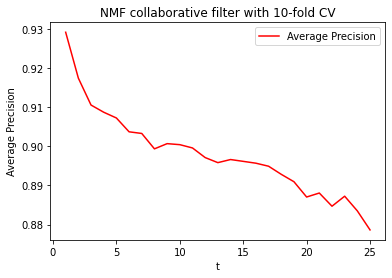

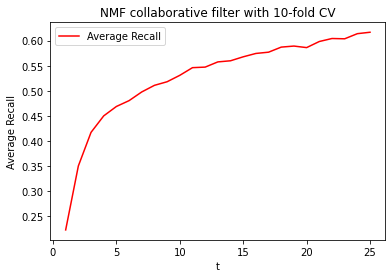

No handles with labels found to put in legend.


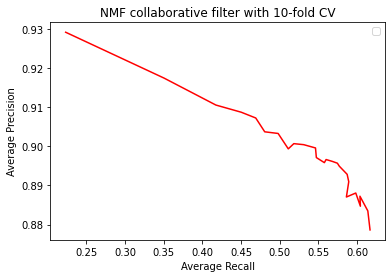

In [33]:
#37

t = np.linspace(1,25,num=25,dtype=int)
avg_precision_nmf = []
avg_recall_nmf = []
kf = KFold(n_splits=10)
for i in t:
    print(i)
    precision_fold = []
    recall_fold = []
    for trainset, testset in kf.split(data):
        G = {}
        for j in testset:
            if j[0] in G.keys():
                if j[2] >= 3.0:
                    G[j[0]].add(j[1])
            else:
                G[j[0]] = set()
                if j[2] >= 3.0:
                    G[j[0]].add(j[1])
        G_items = {}
        for j in testset:
            if j[0] in G_items.keys():
                G_items[j[0]].append(j[1])
            else:
                G_items[j[0]] = []
                G_items[j[0]].append(j[1])
        G_test = [j for j in testset if (len(G[j[0]]) > 0 and len(G_items[j[0]]) >= i)]
        pred = NMF(n_factors=20,verbose=False).fit(trainset).test(G_test)
        user = {}
        for u in pred:
            if u[0] in user.keys():
                item = (u[1],u[3])
                user[u[0]].append(item)
            else:
                user[u[0]] = []
                item = (u[1],u[3])
                user[u[0]].append(item)
        precision_user = []
        recall_user = []
        for u in user.keys():
            S = user[u]
            S = sorted(S,key=lambda x:x[1],reverse=True)
            S = S[:i]
            S_t = set([j[0] for j in S])
            G_truth = G[u]
            precision = len(S_t.intersection(G_truth))/float(len(S_t))
            recall = len(S_t.intersection(G_truth))/float(len(G_truth))
            precision_user.append(precision)
            recall_user.append(recall)
        precision_fold.append(np.mean(precision_user))
        recall_fold.append(np.mean(recall_user))
    avg_precision_nmf.append(np.mean(precision_fold))
    avg_recall_nmf.append(np.mean(recall_fold))
    print(avg_precision_nmf)
    print(avg_recall_nmf)

fig, ax = plt.subplots()
ax.plot(t,avg_precision_nmf, 'r', label='Average Precision')
ax.legend(loc='best')
plt.xlabel("t"); plt.ylabel("Average Precision"); plt.title("NMF collaborative filter with 10-fold CV")
plt.show()

fig, ax = plt.subplots()
ax.plot(t,avg_recall_nmf, 'r', label='Average Recall')
ax.legend(loc='best')
plt.xlabel("t"); plt.ylabel("Average Recall"); plt.title("NMF collaborative filter with 10-fold CV")
plt.show()

fig, ax = plt.subplots()
ax.plot(avg_recall_nmf,avg_precision_nmf, 'r')
ax.legend(loc='best')
plt.xlabel("Average Recall"); plt.ylabel("Average Precision"); plt.title("NMF collaborative filter with 10-fold CV")
plt.show()

1
[0.9360009152344808]
[0.22262086532897576]
2
[0.9360009152344808, 0.9261131120598831]
[0.22262086532897576, 0.3513378080665678]
3
[0.9360009152344808, 0.9261131120598831, 0.9183288826276265]
[0.22262086532897576, 0.3513378080665678, 0.41270348404244084]
4
[0.9360009152344808, 0.9261131120598831, 0.9183288826276265, 0.9150854095845122]
[0.22262086532897576, 0.3513378080665678, 0.41270348404244084, 0.4518670013844944]
5
[0.9360009152344808, 0.9261131120598831, 0.9183288826276265, 0.9150854095845122, 0.912941009185331]
[0.22262086532897576, 0.3513378080665678, 0.41270348404244084, 0.4518670013844944, 0.4706140838039595]
6
[0.9360009152344808, 0.9261131120598831, 0.9183288826276265, 0.9150854095845122, 0.912941009185331, 0.9088996044138344]
[0.22262086532897576, 0.3513378080665678, 0.41270348404244084, 0.4518670013844944, 0.4706140838039595, 0.48298810819405585]
7
[0.9360009152344808, 0.9261131120598831, 0.9183288826276265, 0.9150854095845122, 0.912941009185331, 0.9088996044138344, 0.910

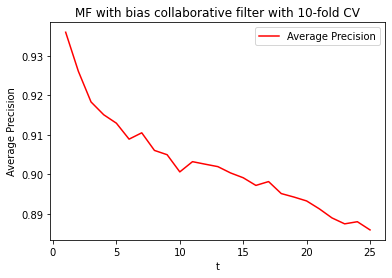

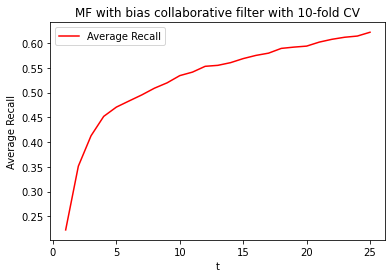

No handles with labels found to put in legend.


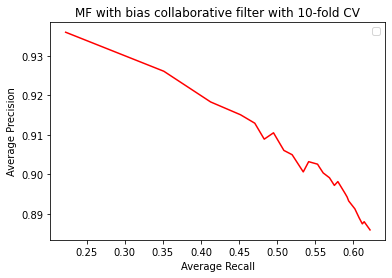

In [34]:
#38

t = np.linspace(1,25,num=25,dtype=int)
avg_precision_svd = []
avg_recall_svd = []
kf = KFold(n_splits=10)
for i in t:
    print(i)
    precision_fold = []
    recall_fold = []
    for trainset, testset in kf.split(data):
        G = {}
        for j in testset:
            if j[0] in G.keys():
                if j[2] >= 3.0:
                    G[j[0]].add(j[1])
            else:
                G[j[0]] = set()
                if j[2] >= 3.0:
                    G[j[0]].add(j[1])
        G_items = {}
        for j in testset:
            if j[0] in G_items.keys():
                G_items[j[0]].append(j[1])
            else:
                G_items[j[0]] = []
                G_items[j[0]].append(j[1])
        G_test = [j for j in testset if (len(G[j[0]]) > 0 and len(G_items[j[0]]) >= i)]
        pred = SVD(n_factors=18,verbose=False).fit(trainset).test(G_test)
        user = {}
        for u in pred:
            if u[0] in user.keys():
                item = (u[1],u[3])
                user[u[0]].append(item)
            else:
                user[u[0]] = []
                item = (u[1],u[3])
                user[u[0]].append(item)
        precision_user = []
        recall_user = []
        for u in user.keys():
            S = user[u]
            S = sorted(S,key=lambda x:x[1],reverse=True)
            S = S[:i]
            S_t = set([j[0] for j in S])
            G_truth = G[u]
            precision = len(S_t.intersection(G_truth))/float(len(S_t))
            recall = len(S_t.intersection(G_truth))/float(len(G_truth))
            precision_user.append(precision)
            recall_user.append(recall)
        precision_fold.append(np.mean(precision_user))
        recall_fold.append(np.mean(recall_user))
    avg_precision_svd.append(np.mean(precision_fold))
    avg_recall_svd.append(np.mean(recall_fold))
    print(avg_precision_svd)
    print(avg_recall_svd)

fig, ax = plt.subplots()
ax.plot(t,avg_precision_svd, 'r', label='Average Precision')
ax.legend(loc='best')
plt.xlabel("t"); plt.ylabel("Average Precision"); plt.title("MF with bias collaborative filter with 10-fold CV")
plt.show()

fig, ax = plt.subplots()
ax.plot(t,avg_recall_svd, 'r', label='Average Recall')
ax.legend(loc='best')
plt.xlabel("t"); plt.ylabel("Average Recall"); plt.title("MF with bias collaborative filter with 10-fold CV")
plt.show()

fig, ax = plt.subplots()
ax.plot(avg_recall_svd,avg_precision_svd, 'r')
ax.legend(loc='best')
plt.xlabel("Average Recall"); plt.ylabel("Average Precision"); plt.title("MF with bias collaborative filter with 10-fold CV")
plt.show()

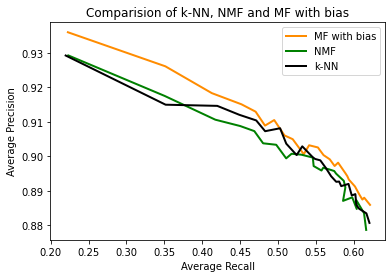

In [35]:
#39

plt.figure()
plt.plot(avg_recall_svd, avg_precision_svd, color='darkorange',lw=2, label='MF with bias')
plt.plot(avg_recall_nmf, avg_precision_nmf, color='green',lw=2, label='NMF')
plt.plot(avg_recall_knn, avg_precision_knn, color='black',lw=2, label='k-NN')
plt.xlabel("Average Recall"); plt.ylabel("Average Precision"); plt.title("Comparision of k-NN, NMF and MF with bias")
plt.legend(loc="best")
plt.show()